In [1]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder

# importowanie csv do ramki danych
class ReadDataCSV:
    def csv_data(samplecsv):
        return pd.read_csv(samplecsv, delimiter=';')
ReadDataCSV.csv_data('secondary_data.csv')

# mushrooms = pd.read_csv('secondary_data.csv', delimiter=';')
# mushroomsBackup = pd.read_csv('secondary_data.csv', delimiter=';')
# mushrooms

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [2]:
# podstawowe startowe informacje na temat zbioru
class ShowDatasetInfo:
    def dataset_info(ds):
        print(ds.describe())
        print(ds.info())
        print(ds.isnull().values.any())

ShowDatasetInfo.dataset_info(ReadDataCSV.csv_data('secondary_data.csv'))    

       cap-diameter   stem-height    stem-width
count  61069.000000  61069.000000  61069.000000
mean       6.733854      6.581538     12.149410
std        5.264845      3.370017     10.035955
min        0.380000      0.000000      0.000000
25%        3.480000      4.640000      5.210000
50%        5.860000      5.950000     10.190000
75%        8.540000      7.740000     16.570000
max       62.340000     33.920000    103.910000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 


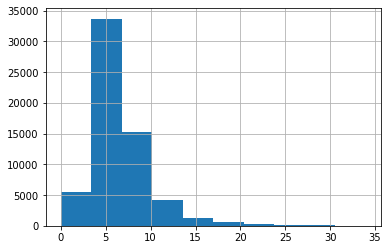

In [3]:
# histogram z przedziałem pojawiających się wysokości nóżki grzyba
class CreateDataHist:
    def data_hist(sampledf, histdata):
        sampledf[histdata].hist(bins=10)
CreateDataHist.data_hist(ReadDataCSV.csv_data('secondary_data.csv'), 'stem-height')
# mushrooms['stem-height'].hist(bins=10)

In [4]:
# usuwania niepotrzebnych kolumn
mushrooms = ReadDataCSV.csv_data('secondary_data.csv')
mushrooms.drop(['gill-spacing','stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color', 'season', 'habitat'], axis=1, inplace = True)
mushrooms

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type
0,p,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g
1,p,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g
2,p,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g
3,p,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p
4,p,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,3.93,6.22,y,f,f
61065,p,1.27,f,s,y,f,f,f,3.18,5.43,y,f,f
61066,p,1.27,s,s,y,f,f,f,3.86,6.37,y,f,f
61067,p,1.24,f,s,y,f,f,f,3.56,5.44,y,f,f


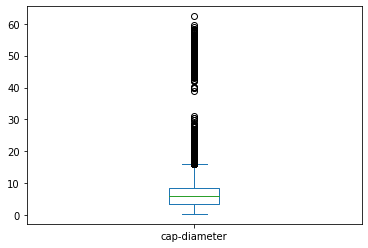

In [5]:
# przedział w postaci plot boxa o średnica kapelusza
class CreateDataPlotBox:
    def plot_box_data(sampledf, pltdata):
        sampledf[pltdata].plot.box()
CreateDataPlotBox.plot_box_data(mushrooms, 'cap-diameter')
# mushrooms['cap-diameter'].plot.box()

In [6]:
# zamiana wartości tekstowych na liczbowe
class ChangeValueType:
    def change_value_type(ds):
        optimizedds = OrdinalEncoder().fit_transform(ds)
        return optimizedds

mushrooms = ChangeValueType.change_value_type(mushrooms)
mushrooms

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type
0,1,15.26,1,1,1,1,1,1,16.95,17.09,1,1,1
1,1,16.60,1,1,1,1,1,1,17.99,18.19,1,1,1
2,1,14.07,1,1,1,1,1,1,17.80,17.74,1,1,1
3,1,14.17,2,2,2,1,1,1,15.77,15.98,1,1,2
4,1,14.64,1,2,1,1,1,1,16.53,17.20,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1,1.18,6,7,7,1,8,12,3.93,6.22,2,2,5
61065,1,1.27,2,7,7,1,8,12,3.18,5.43,2,2,5
61066,1,1.27,6,7,7,1,8,12,3.86,6.37,2,2,5
61067,1,1.24,2,7,7,1,8,12,3.56,5.44,2,2,5


<AxesSubplot: >

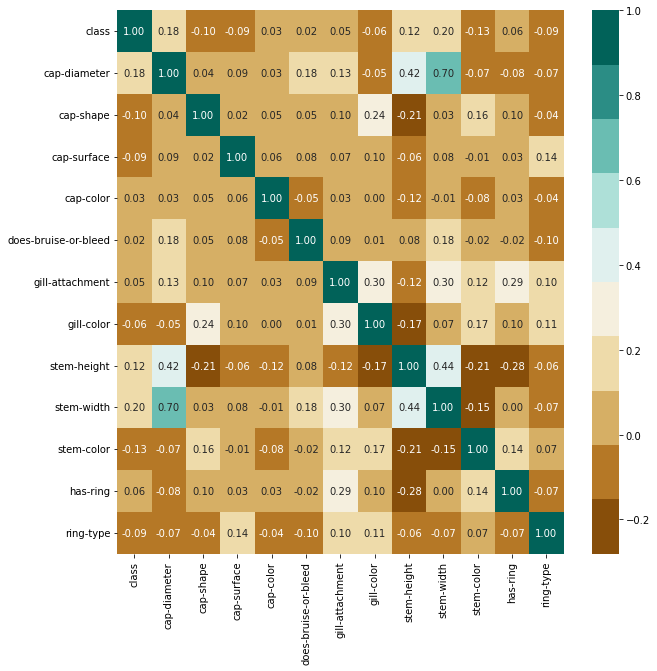

In [7]:
# utworzenie korelacji i na jej podstawie heatmapy
correlations = mushrooms.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.color_palette("BrBG", 10)
sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")

In [8]:
# usuwanie nulli
class DeleteNull:
    def null_delete(df):
        df.dropna(axis=0)
        print(df.isnull().values.any())
DeleteNull.null_delete(mushrooms)
# mushrooms.dropna(axis=0)
# print(mushrooms.isnull().values.any())

False


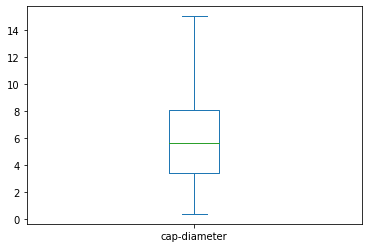

In [9]:
# zoptymalizowanie plot boxa o wartości odstające
class PlotboxOptimilization:
    def plotbox_optimalization_greater(df, optimizedData, optimizedValue ):
        df = df.drop(df[df[optimizedData] > optimizedValue].index)
        df[optimizedData].plot(kind='box')
    def plotbox_optimalization_lower(df, optimizedData, optimizedValue ):
        df = df.drop(df[df[optimizedData] < optimizedValue].index)
        df[optimizedData].plot(kind='box')

PlotboxOptimilization.plotbox_optimalization_greater(mushrooms,'cap-diameter', 15)
# mushrooms = mushrooms.drop(mushrooms[mushrooms['cap-diameter'] > 15].index)
# mushrooms['cap-diameter'].plot(kind='box')

In [10]:
# utworzenie zmiennych potrzebnych do trenowania modelu
X = mushrooms.drop('class', axis=1).to_numpy()
X

array([[15.26,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ],
       [16.6 ,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ],
       [14.07,  1.  ,  1.  , ...,  1.  ,  1.  ,  1.  ],
       ...,
       [ 1.27,  6.  ,  7.  , ...,  2.  ,  2.  ,  5.  ],
       [ 1.24,  2.  ,  7.  , ...,  2.  ,  2.  ,  5.  ],
       [ 1.17,  6.  ,  7.  , ...,  2.  ,  2.  ,  5.  ]])

In [11]:
Y = mushrooms.loc[:, 'class'].to_numpy()
Y

array([1, 1, 1, ..., 1, 1, 1])

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12345)

In [13]:
# funkcja trenowania modelu
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # trenuj model
    classifier.fit(feature_vector_train, label)
    
    # wygeneruj przewidywania modelu dla zbioru testowego
    predictions = classifier.predict(feature_vector_valid)
    
    # dokonaj ewaluacji modelu na podstawie danych testowych
    scores = list(metrics.precision_recall_fscore_support(predictions, Y_test))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]
    score_vals.append(metrics.accuracy_score(predictions, Y_test))
    return score_vals

In [14]:
# MODEL 1 - regresja logistyczna 
accuracy = train_model(linear_model.LogisticRegression(), X_train, Y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

LR:  [0.7205665388020065, 0.612106780298283, 0.6619231551128278, 0.591534304896021]


In [15]:
#model 3 random forest
accuracy = train_model(ensemble.RandomForestClassifier(), X_train, Y_train, X_test)
accuracy_compare['RF'] = accuracy
print ("RF: ", accuracy)

RF:  [0.9995573915609324, 0.9997048841670355, 0.9996311324234599, 0.9995906336990339]


In [16]:
# MODEL 2 - Support Vector Machine
accuracy = train_model(svm.SVC(), X_train, Y_train, X_test)
accuracy_compare['SVM'] = accuracy
print ("SVM" , accuracy)

SVM [0.9281498967246975, 0.8826995930966747, 0.904854368932039, 0.8916816767643687]


In [17]:
# MODEL 4 - neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
accuracy = train_model(mlp, X_train, Y_train, X_test)
accuracy_compare['neural network'] = accuracy
print ("neural network" , accuracy)

neural network [0.9625258188256123, 0.9553375311172939, 0.9589182038656573, 0.9542328475519896]


<AxesSubplot: >

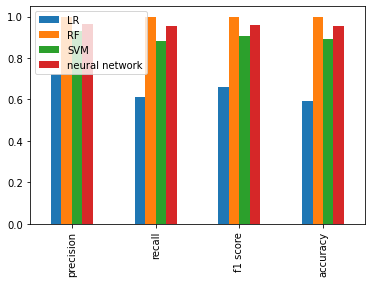

In [18]:
# porównanie wyników z 4 modeli uczenia się
df_compare = pd.DataFrame(accuracy_compare, index = ['precision', 'recall', 'f1 score', 'accuracy'])
df_compare.plot(kind='bar')